Text(0, 0.5, 'Output Token Throughput (tok/s)')

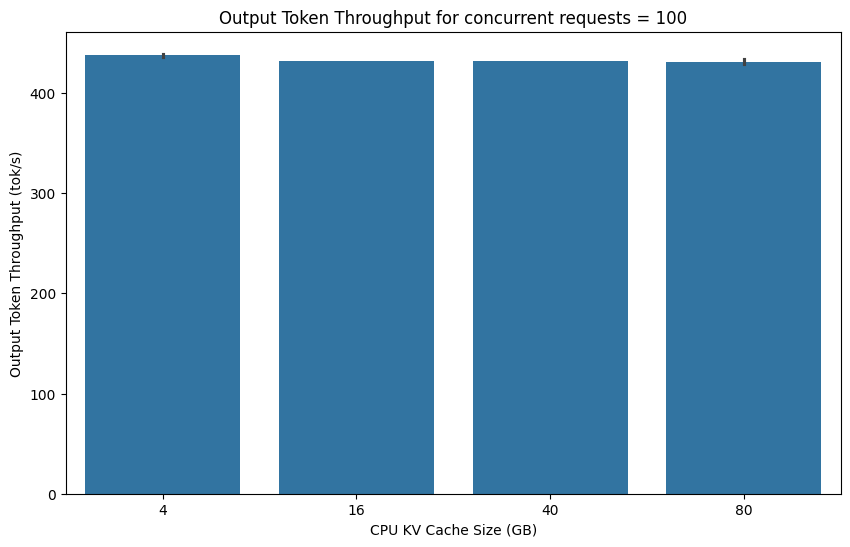

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df_summary = pd.read_csv('/home/ditto-bud/results/kv-cache-exp/meta-llama--Meta-Llama-3.1-8B-Instruct/summary.csv')
df_engine = pd.read_csv('/home/ditto-bud/results/kv-cache-exp/meta-llama--Meta-Llama-3.1-8B-Instruct/engine_config.csv')
df_system = pd.read_csv('/home/ditto-bud/results/kv-cache-exp/meta-llama--Meta-Llama-3.1-8B-Instruct/system_metrics.csv')
df = pd.merge(df_summary, df_engine, on='engine_config_id', how='inner')
df = pd.merge(df, df_system, on='run_id', how='inner')

#remove columns with all empty values
# cleaned_df = df.dropna(axis=1, how='all')
# Select only numeric columns
# numeric_data = cleaned_df.select_dtypes(include=['float64', 'int64'])

# filter the dataframe to only include the rows where the mean input tokens is 100   
filtered_df = df[df['Concurrent Requests'] == 100]
# filtered_df = filtered_df[filtered_df['Mean Input Tokens'] == 200]
# filtered_df = filtered_df[filtered_df['Mean Output Tokens'] == 128]
# print(filtered_df.head())

# Plotting the data for filtered dataframe
plt.figure(figsize=(10, 6))
# sns.barplot(x='cpu_kv_cache_size', y='Output Token Throughput (tok/s)', data=filtered_df)
sns.barplot(x='cpu_kv_cache_size', y='Output Token Throughput (tok/s)', data=filtered_df)
plt.title('Output Token Throughput for concurrent requests = 100')
plt.xlabel('CPU KV Cache Size (GB)')
plt.ylabel('Output Token Throughput (tok/s)')

Text(0, 0.5, 'CPU Memory Available (%)')

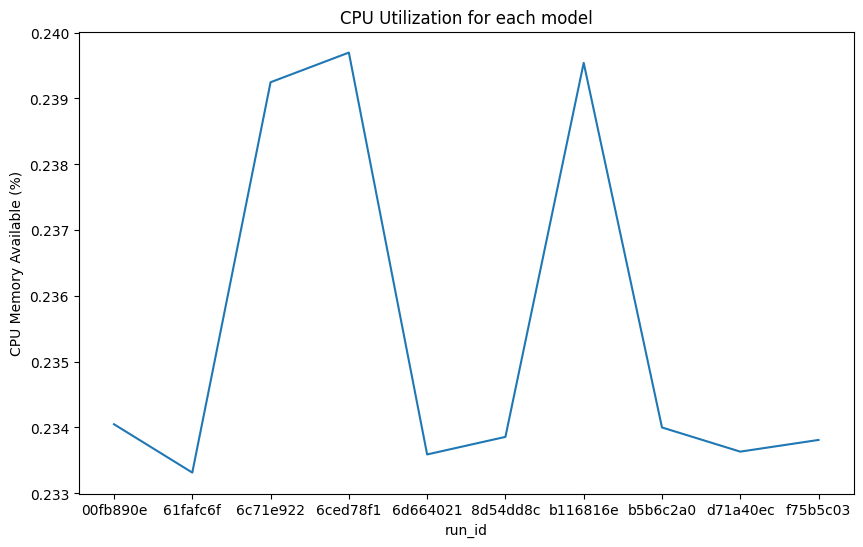

In [7]:

#filter df with only the models that have a mean input token of 100
# filtered_df = df[df['Mean Input Tokens'] == 100]

#plot resource usage for each model against each run_id
util_df = filtered_df[['run_id', 'cpu_memory_utilization']].groupby('run_id').mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x='run_id', y='cpu_memory_utilization', data=util_df.sort_values(by='run_id'))
# sns.lineplot(x='run_id', y='Concurrent Requests', data=util_df)
# sns.lineplot(x='run_id', y='Output Token Throughput per User (tok/s)', data=util_df)
plt.title('CPU Utilization for each model')
plt.xlabel('run_id')
plt.ylabel('CPU Memory Available (%)')


In [5]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

ydata_df = pd.DataFrame(df, columns=["a", "b", "c", "d", "e"])
profile = ProfileReport(df, title="Profiling Report")


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


                                          Mean Input Tokens  \
Mean Input Tokens                                  1.000000   
Mean Output Tokens                                -0.017338   
Concurrent Requests                                0.068649   
Completed Requests                                 0.068649   
Duration (s)                                       0.217758   
Request Throughput (req/min)                      -0.145536   
Output Token Throughput (tok/s)                   -0.193574   
Output Token Throughput per User (tok/s)          -0.202293   
Mean End to End Latency (s)                        0.224103   
Mean TTFT (ms)                                     0.306569   
P95 TTFT (ms)                                      0.163036   
Mean Inter Token Latency (ms)                      0.309054   
P95 Inter Token Latency (ms)                       0.250604   
tensor_parallel_size                                    NaN   
pipeline_parallel_size                                 

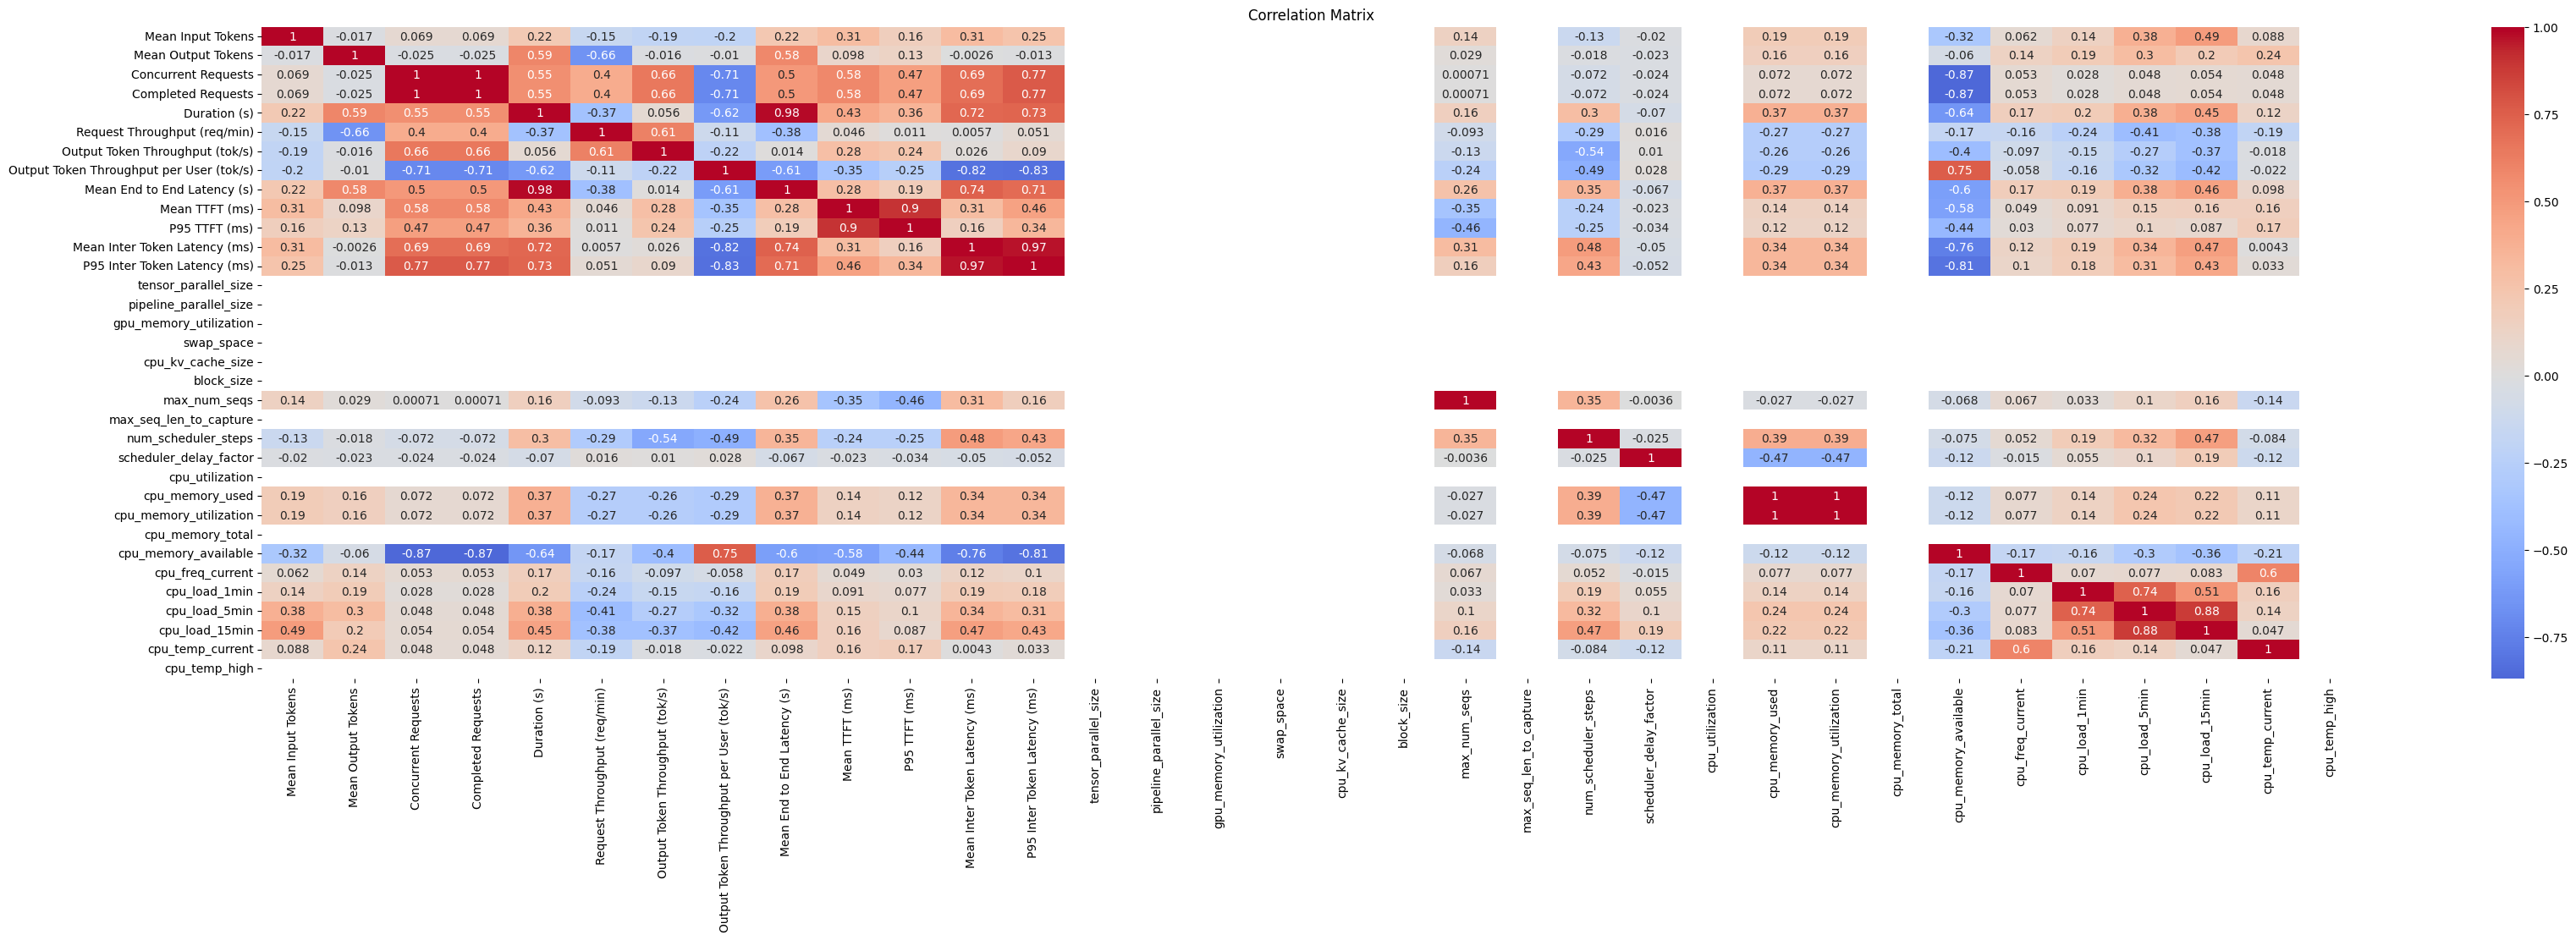

<Figure size 640x480 with 0 Axes>

In [ ]:
#remove columns with all empty values
cleaned_df = df.dropna(axis=1, how='all')

# Select only numeric columns
numeric_data = cleaned_df.select_dtypes(include=['float64', 'int64'])

# Get correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)

#display the correlation matrix as a heatmap
plt.figure(figsize=(40, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

#save this as a png
plt.savefig('correlation_matrix.png')

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = numeric_data.drop('cpu_memory_utilization', axis=1)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Initialize PCA with the number of components you want
pca = PCA(n_components=2)  # Change n_components based on your requirements
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame with principal components and target variable
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['cpu_memory_utilization'] = numeric_data['cpu_memory_utilization']

print(pca_df)


            PC1       PC2  cpu_memory_utilization
0     -6.800690  0.946487                0.234450
1     -6.369310  0.361668                0.234458
2     -6.292279  0.237870                0.234458
3     -6.394159  0.307312                0.234459
4     -6.335463  1.841666                0.234459
...         ...       ...                     ...
17506  3.082175  1.717102                0.234986
17507  3.352125  1.363120                0.234986
17508  3.356864  1.353430                0.234986
17509  3.031940  1.797424                0.234986
17510  3.375197  1.329528                0.234986

[17511 rows x 3 columns]


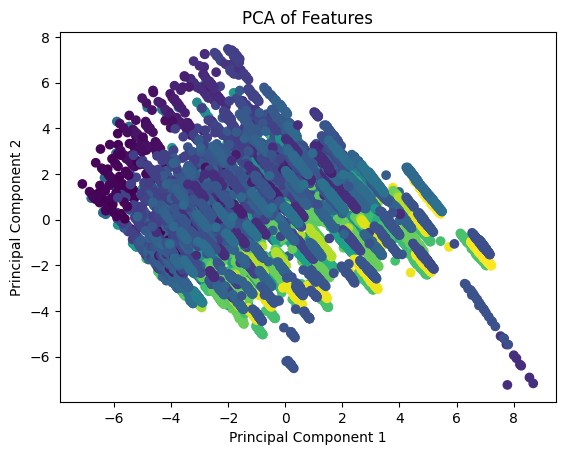

In [3]:
import matplotlib.pyplot as plt

plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cpu_memory_utilization'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Features')
plt.show()


In [4]:
# Step 3: Calculate the PCA loadings (components)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=features.columns)
print("PCA Loadings:")
print(loadings)

# Step 4: Calculate correlation between principal components and original features
pca_correlations = pd.DataFrame(scaled_features).corrwith(pd.DataFrame(principal_components, columns=['PC1', 'PC2'])['PC1'])
print("\nCorrelations of PC1 with original features:")
print(pca_correlations)

# For PC2
pca_correlations_pc2 = pd.DataFrame(scaled_features).corrwith(pd.DataFrame(principal_components, columns=['PC1', 'PC2'])['PC2'])
print("\nCorrelations of PC2 with original features:")
print(pca_correlations_pc2)

PCA Loadings:
                                                   PC1           PC2
Mean Input Tokens                         1.352802e-01 -8.491113e-02
Mean Output Tokens                        9.860681e-02 -1.957448e-01
Concurrent Requests                       2.825963e-01  2.958249e-01
Completed Requests                        2.825963e-01  2.958249e-01
Duration (s)                              3.177876e-01 -8.851763e-02
Request Throughput (req/min)             -4.147023e-02  3.911855e-01
Output Token Throughput (tok/s)           5.406684e-02  4.052167e-01
Output Token Throughput per User (tok/s) -3.095431e-01 -7.370064e-02
Mean End to End Latency (s)               3.060223e-01 -1.055403e-01
Mean TTFT (ms)                            2.232491e-01  1.277904e-01
P95 TTFT (ms)                             1.750934e-01  1.019254e-01
Mean Inter Token Latency (ms)             3.266286e-01  4.216039e-03
P95 Inter Token Latency (ms)              3.365603e-01  3.359606e-02
tensor_parallel_size

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [2]:
def automated_correlation_analysis(df, target_variable, correlation_threshold=0.3):
    # Encode categorical variables
    # categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    # df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    
    # Compute correlation matrix
    corr_matrix = numeric_data.corr()
    target_corr = corr_matrix[target_variable].sort_values(ascending=False)
    
    # Select features based on threshold
    high_corr_features = target_corr[abs(target_corr) > correlation_threshold].index.tolist()
    if target_variable in high_corr_features:
        high_corr_features.remove(target_variable)
    
    # Return selected features and correlation values
    selected_features = numeric_data[high_corr_features + [target_variable]]
    return selected_features, target_corr

# Usage
selected_features_df, target_corr_values = automated_correlation_analysis(filtered_df, 'cpu_memory_utilization')
print("Selected Features:\n", selected_features_df.columns.tolist())
print("Correlation Values:\n", target_corr_values)

Selected Features:
 ['cpu_memory_used', 'num_scheduler_steps', 'P95 Inter Token Latency (ms)', 'Duration (s)', 'Mean Inter Token Latency (ms)', 'Mean End to End Latency (s)', 'scheduler_delay_factor', 'cpu_memory_utilization']
Correlation Values:
 cpu_memory_utilization                      1.000000
cpu_memory_used                             1.000000
num_scheduler_steps                         0.475107
P95 Inter Token Latency (ms)                0.322274
Duration (s)                                0.321812
Mean Inter Token Latency (ms)               0.313079
Mean End to End Latency (s)                 0.309925
cpu_load_5min                               0.259346
cpu_load_15min                              0.225596
cpu_temp_current                            0.182005
cpu_load_1min                               0.163065
P95 TTFT (ms)                               0.135659
Mean TTFT (ms)                              0.134978
Mean Output Tokens                          0.134517
Mean Input

In [5]:
from causalnex.structure import StructureModel
from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

import pandas as pd

# Step 1: Load Sample Data

# Step 2: Create a Causal Structure Model Using Notears
#remove columns with all empty values
cleaned_df = filtered_df.dropna(axis=1, how='all')
# Select only numeric columns
numeric_data = cleaned_df.select_dtypes(include=['float64', 'int64'])
sm = from_pandas(numeric_data)
sm.remove_edges_below_threshold(0.01)
# Step 3: Visualize the Causal Structure
viz = plot_structure(
    sm,
    # graph_attributes={"scale": "2.0"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
viz.show("01_simple_plot.html")

/home/ditto-bud/.venv/lib/python3.10/site-packages/scipy/linalg/_matfuncs.py:355: RuntimeWarning: overflow encountered in matmul
  eAw = eAw @ eAw
/home/ditto-bud/.venv/lib/python3.10/site-packages/scipy/linalg/_matfuncs.py:355: RuntimeWarning: invalid value encountered in matmul
  eAw = eAw @ eAw
/home/ditto-bud/.venv/lib/python3.10/site-packages/scipy/linalg/_matfuncs.py:323: RuntimeWarning: overflow encountered in matmul
  m, s = pick_pade_structure(Am)
/home/ditto-bud/.venv/lib/python3.10/site-packages/scipy/linalg/_matfuncs.py:323: RuntimeWarning: invalid value encountered in matmul
  m, s = pick_pade_structure(Am)
/home/ditto-bud/.venv/lib/python3.10/site-packages/causalnex/structure/notears.py:407: RuntimeWarning: invalid value encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2


01_simple_plot.html


/home/ditto-bud/.venv/lib/python3.10/site-packages/causalnex/structure/notears.py:436: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")
